In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import shutil

In [7]:
directory = os.getcwd()
print (directory)
scores = {'SCORE':[], 'total_score':[], 'dslf_fa13':[], 'fa_atr':[], 'fa_dun':[], 'fa_elec':[], 'fa_intra_rep':[], 'fa_intra_sol_xover4':[], 'fa_rep':[], 'fa_sol':[], 'geo':[], 'hbond_bb_sc':[], 'hbond_lr_bb':[], 'hbond_sc':[], 'hbond_sr_bb':[], 'holes':[], 'lk_ball_wtd':[], 'omega':[], 'p_aa_pp':[], 'packstat':[], 'pro_close':[], 'rama_prepro':[], 'ref':[], 'sspred':[], 'yhh_planarity':[], 'description':[],}
score_frame = pd.DataFrame(scores)
# for directory in directories: 
#     number = int(directory.split('_', 3)[-1])
#     print dataset_num
for root, dirs, files in os.walk(directory):
        if root != directory and root!= "/home/srgerb/hBundles/scripts/.ipynb_checkpoints/":
            score_file = root + "/score.sc"
            print (score_file)
#             dataset_num = np.array([number])
            if os.path.exists(score_file) == True:
                df = pd.read_csv(score_file, header=1, sep='\s+')
#                 dataset_num = np.repeat(dataset_num, df.shape[0])
#                 print dataset_num
#                 df['dataset'] = dataset_num
                score_frame = pd.concat([score_frame, df])
print (score_frame)

/home/srgerb/hBundles/scripts
/home/srgerb/hBundles/scripts/.ipynb_checkpoints/score.sc
Empty DataFrame
Columns: [SCORE, description, dslf_fa13, fa_atr, fa_dun, fa_elec, fa_intra_rep, fa_intra_sol_xover4, fa_rep, fa_sol, geo, hbond_bb_sc, hbond_lr_bb, hbond_sc, hbond_sr_bb, holes, lk_ball_wtd, omega, p_aa_pp, packstat, pro_close, rama_prepro, ref, sspred, total_score, yhh_planarity]
Index: []

[0 rows x 26 columns]


[]
['0_input_0013_0001' '0_input_0013_0002' '0_input_0013_0003' ...,
 '46_input_0027_0008' '46_input_0027_0009' '46_input_0027_0010']
-366.52879671 8.25000509699
-91.331501702 2.24471607935
14.5312220121 1.93047997784
4.84161289713 2.40138604437
-48.5951575265 2.72810372281


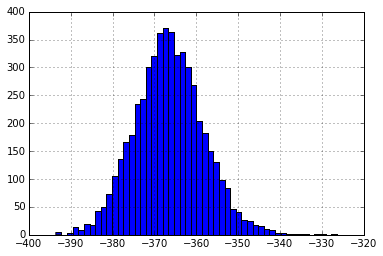

In [16]:
print score_frame.loc[(score_frame['description'] == 'nan'),'sspred'].values
score_frame['total_score'].hist(bins=50)
print score_frame.loc[(score_frame['total_score'] < -210), 'description'].values
print score_frame['total_score'].mean(), score_frame['total_score'].std()
print score_frame['hbond_lr_bb'].mean(), score_frame['hbond_lr_bb'].std()
print score_frame['omega'].mean(), score_frame['omega'].std()
print score_frame['rama_prepro'].mean(), score_frame['rama_prepro'].std()
print score_frame['p_aa_pp'].mean(), score_frame['p_aa_pp'].std()

['0_input_0013_0001' '0_input_0013_0002' '0_input_0013_0003' ...,
 '46_input_0027_0008' '46_input_0027_0009' '46_input_0027_0010']


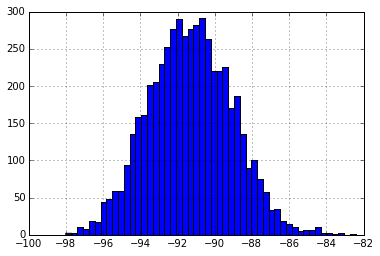

In [17]:
score_frame['hbond_lr_bb'].hist(bins=50)
# score_frame_2['hbond_lr_bb'].hist()
print score_frame.loc[(score_frame['hbond_lr_bb'] < -65), 'description'].values


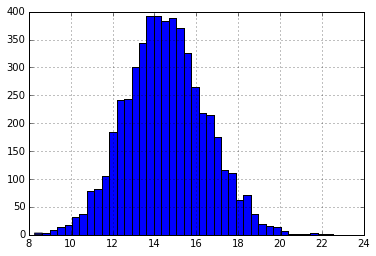

In [18]:
score_frame['omega'].hist(bins=40)

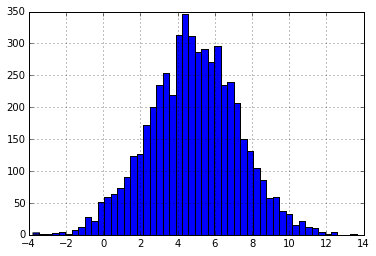

In [19]:
score_frame['rama_prepro'].hist(bins=50)

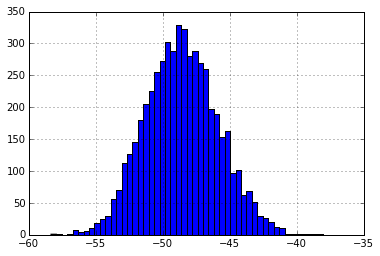

In [20]:
score_frame['p_aa_pp'].hist(bins=50)

-29.2223226172 4.61183850383


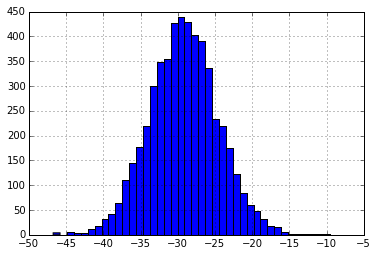

In [21]:
score_frame['strain'] = score_frame['omega'] + score_frame['rama_prepro'] + score_frame['p_aa_pp']
score_frame['strain'].hist(bins=40)
print score_frame['strain'].mean(), score_frame['strain'].std()

118.204856278 6.31129371784


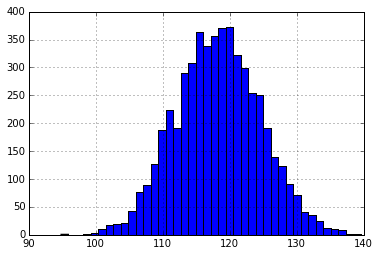

In [22]:
score_frame['fa_dun'].hist(bins=40)
print score_frame['fa_dun'].mean(), score_frame['fa_dun'].std()

-271.386277042 9.779548893


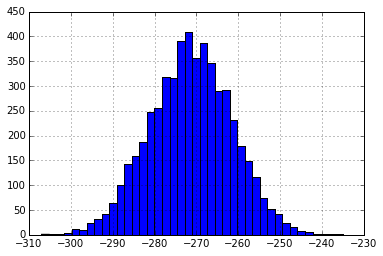

In [23]:
score_frame['fa_elec'].hist(bins=40)
print score_frame['fa_elec'].mean(), score_frame['fa_elec'].std()

3.51341471256 0.456668861777


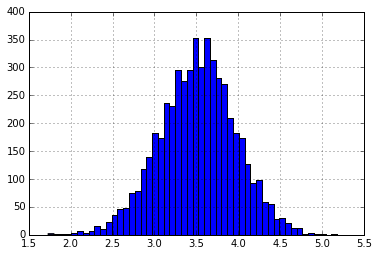

In [24]:
score_frame['holes'].hist(bins=50)
print score_frame['holes'].mean(), score_frame['holes'].std()

0.509904689864 0.0440391222717


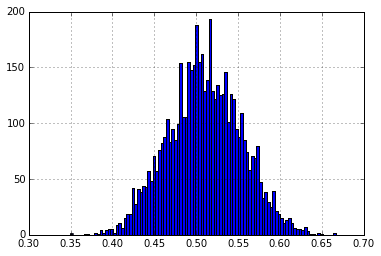

In [25]:
score_frame['packstat'].hist(bins=100)
print score_frame['packstat'].mean(), score_frame['packstat'].std()

total_score  -371.343361442 12.0834239423
omega        14.1069970252 1.83911644451
hbond_lr_bb  -90.9413218535 2.72848392527
rama_prepro  3.88886647597 2.49960598166
p_aa_pp      -49.6271014874 2.78038693076
hbond_sc     -28.2998850114 4.34497194618
(2909, 33)


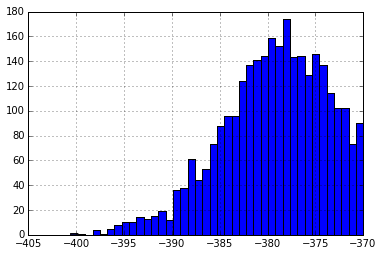

In [6]:
# score_subgroup = score_frame.loc[(score_frame['hbond_lr_bb'] < -53 ) & (score_frame['strain'] < -5 ) & (score_frame['holes'] < 3 ) ]
score_subgroup = score_frame.loc[(score_frame['total_score'] < -370 ) & (score_frame['omega'] < 15) & (score_frame['hbond_lr_bb'] < -72) & (score_frame['rama_prepro'] < 4.5) & (score_frame['p_aa_pp'] < -48)]
score_subgroup['total_score'].hist(bins=40)
print 'total_score ', score_frame['total_score'].mean(), score_frame['total_score'].std()
print 'omega       ', score_frame['omega'].mean(), score_frame['omega'].std()
print 'hbond_lr_bb ', score_frame['hbond_lr_bb'].mean(), score_frame['hbond_lr_bb'].std()
print 'rama_prepro ', score_frame['rama_prepro'].mean(), score_frame['rama_prepro'].std()
print 'p_aa_pp     ', score_frame['p_aa_pp'].mean(), score_frame['p_aa_pp'].std()
print 'hbond_sc    ', score_frame['hbond_sc'].mean(), score_frame['hbond_sc'].std()
print score_subgroup.shape

3.47627180527 0.44077202129


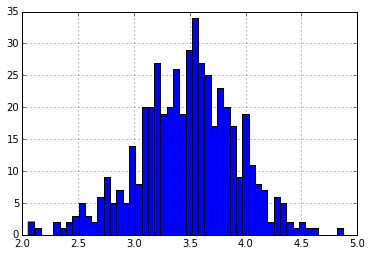

In [37]:
score_subgroup['holes'].hist(bins=50)
print score_subgroup['holes'].mean(), score_subgroup['holes'].std()

-90.9352190669 2.18697974549


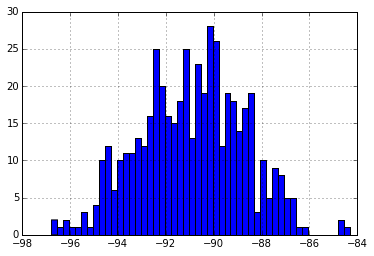

In [38]:
score_subgroup['hbond_lr_bb'].hist(bins=50)
print score_subgroup['hbond_lr_bb'].mean(), score_subgroup['hbond_lr_bb'].std()

13.3210507099 1.1986862437


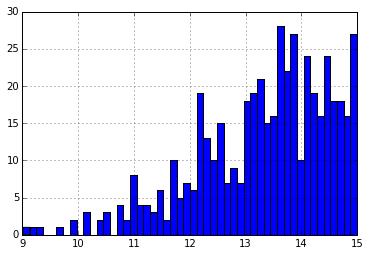

In [39]:
score_subgroup['omega'].hist(bins=50)
print score_subgroup['omega'].mean(), score_subgroup['omega'].std()

-35.0415922921 2.93619372583


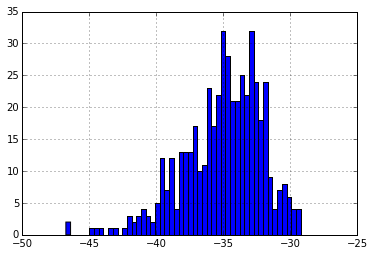

In [40]:
score_subgroup['strain'].hist(bins=50)
print score_subgroup['strain'].mean(), score_subgroup['strain'].std()

In [1]:
score_subgroup_array = score_subgroup.as_matrix()
for item in range(0, len(score_subgroup_array)):
    vals = score_subgroup_array[item][2].split('_', 4)
    file_subdirectory = '/' + vals[0] + '_' + vals[2]
    print file_subdirectory
    file_to_copy = directory + file_subdirectory + '/' + score_subgroup_array[item][2] + '.pdb'
#    new_file_name = str(int(score_subgroup_array[item][2])) + '_' + score_subgroup_array[item][3] + '.pdb'
    shutil.copyfile(file_to_copy, "/gpfs/DS3524-1/WORK/srgerb/core_design/n5_n6_extended/all_res_specified/round2/%s.pdb" %(score_subgroup_array[item][2]))

NameError: name 'score_subgroup' is not defined

In [43]:
proba = np.zeros((109, 20))
input_file = "/gpfs/DS3524-1/WORK/av9/beta_barrel/bluePrintBuild/AAG-AA-AAG-AA-AAG-AA-AAG/round_6/pdbs.probs.txt"
with open(input_file, 'r') as f:
    for line in f:
        if line[0] != "#":
      "            vals = line.replace(' ', '').split('\\t', 25)\n",
      "            proba[int(vals[0])-1] = vals[1:21]\n",
      " \n",
      "print proba\n",
      "my_xticks = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']\n",
      "plt.pcolor(proba)\n",
      "plt.colorbar()\n",
      "proba = proba /score_subgroup.shape[0]

IndentationError: unindent does not match any outer indentation level (<ipython-input-43-41618059e865>, line 6)

[]
['A', 'D', 'N', 'P', 'S', 'T']
['A', 'P', 'W']
['A', 'D', 'E', 'F', 'I', 'L', 'M', 'R', 'S', 'W']
['A']
['L']
['A', 'F', 'G', 'L', 'Q', 'R', 'W', 'Y']
['P']
['G']
['K', 'R', 'T']
['W', 'Y']
['E', 'R', 'T']
['I', 'V', 'W']
['E', 'R', 'T']
['M', 'V']
['E', 'K', 'Q', 'R']
['E', 'I', 'R', 'S', 'V']
['E', 'S']
['D']
['G']
['K', 'R']
['E', 'R', 'T']
['E', 'W']
['E', 'R', 'T']
['G']
['E', 'H', 'K', 'T']
['A', 'M']
['E']
['I', 'V']
['H', 'K']
['P']
['R', 'T']
['T']
[]
['D', 'T', 'Y']
['E', 'K', 'R']
['A', 'V']
['E', 'K']
['I', 'V']
['E', 'R', 'T']
['F', 'I']
['E', 'K', 'S', 'T']
['G']
['K']
['E', 'Q', 'R', 'S', 'T']
['A', 'E', 'S']
['D']
['G']
['R']
['P']
['A', 'F', 'I', 'T', 'V', 'W']
['E', 'R', 'S']
['G']
['S', 'T']
['G']
['E', 'H', 'K', 'T']
['I', 'M', 'V']
['E', 'K', 'R', 'T']
['A', 'V']
['K', 'R', 'T']
['T']
[]
['D', 'T', 'Y']
['E', 'K', 'R']
['A', 'V']
['E', 'K', 'R']
['I', 'M']
['E', 'R', 'T']
['I', 'M', 'V']
['E', 'K', 'Q', 'R']
['E', 'F', 'L', 'V', 'W', 'Y']
['E', 'K', 'S']
['D']
[